In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/alzheimer/dataset.zip'
extract_path = '/content/dataset'

In [3]:
from google.colab import files
uploaded = files.upload()

Saving datasetCorrecto.zip to datasetCorrecto.zip


In [4]:
import zipfile
import os

zip_path = "datasetCorrecto.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

In [5]:
# Verificar si hay GPU disponible
import tensorflow as tf
from tensorflow.python.client import device_lib

print("\n📟 Dispositivos disponibles:")
print(device_lib.list_local_devices())
print("\n🚀 TensorFlow detecta GPU:", tf.config.list_physical_devices('GPU'))



📟 Dispositivos disponibles:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11693288563857750579
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14091184485710609844
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]

🚀 TensorFlow detecta GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
# Activar Mixed Precision
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


In [7]:
#Cargar el  del dataset
base_dir = '/content/dataset'
train_dir = f'{base_dir}/train'
val_dir = f'{base_dir}/val'
test_dir = f'{base_dir}/test'


In [8]:
#hiperparametros
input_shape = (128, 128, 3)
num_classes = 4
class_names = ['AD', 'CN', 'EMCI', 'LMCI']
batch_size = 32
epochs = 12

Modelo CNN 2 optimizado

In [9]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.optimizers import Adam

def build_cnn2_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # CNN 2
    x = layers.Conv2D(32, (5, 5), activation='relu', padding='same', name="cnn2_conv1")(inputs)
    x = layers.Conv2D(32, (5, 5), activation='relu', padding='same', name="cnn2_conv2")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (5, 5), activation='relu', padding='same', name="cnn2_conv3")(x)
    x = layers.Conv2D(128, (5, 5), activation='relu', padding='same', name="cnn2_conv4")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(512, (5, 5), activation='relu', padding='same', name="cnn2_conv5")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu', name="cnn2_dense")(x)

    # Capa de salida
    output = layers.Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=output)

# Construcción y compilación
model = build_cnn2_model(input_shape, num_classes)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast (Cast)                     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn2_conv1 (Conv2D)             │ (None, 128, 128, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn2_conv2 (Conv2D)             │ (None, 128, 128, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn2_conv3 (Conv2D)             │ (None, 64, 64, 128)    │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn2_conv4 (Conv2D)             │ (None, 64, 64, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn2_conv5 (Conv2D)             │ (None, 32, 32, 512)    │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn2_dense (Dense)              │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,959,140 (72.32 MB)

 Trainable params: 18,958,116 (72.32 MB)

 Non-trainable params: 1,024 (4.00 KB)

Generadores de datos

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 23244 images belonging to 4 classes.
Found 5812 images belonging to 4 classes.
Found 7264 images belonging to 4 classes.


Entrenamiento del modelo

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# 1. Definir modelo si aún no está creado
model = build_cnn2_model(input_shape, num_classes)

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 2. Callback de detención temprana
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# 3. Entrenamiento
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=[early_stop]
)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_1 (Cast)                   │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn2_conv1 (Conv2D)             │ (None, 128, 128, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn2_conv2 (Conv2D)             │ (None, 128, 128, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn2_conv3 (Conv2D)             │ (None, 64, 64, 128)    │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn2_conv4 (Conv2D)             │ (None, 64, 64, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn2_conv5 (Conv2D)             │ (None, 32, 32, 512)    │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn2_dense (Dense)              │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,959,140 (72.32 MB)

 Trainable params: 18,958,116 (72.32 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/12


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


727/727 ━━━━━━━━━━━━━━━━━━━━ 409s 99ms/step - accuracy: 0.4963 - loss: 1.5425 - val_accuracy: 0.7269 - val_loss: 0.6542
Epoch 2/12
727/727 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.7767 - loss: 0.5326 - val_accuracy: 0.8116 - val_loss: 0.4296
Epoch 3/12
727/727 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.8776 - loss: 0.3133 - val_accuracy: 0.8605 - val_loss: 0.3536
Epoch 4/12
727/727 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9327 - loss: 0.1836 - val_accuracy: 0.9136 - val_loss: 0.2260
Epoch 5/12
727/727 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9615 - loss: 0.1132 - val_accuracy: 0.9250 - val_loss: 0.2000
Epoch 6/12
727/727 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.9737 - loss: 0.0782 - val_accuracy: 0.9209 - val_loss: 0.2127
Epoch 7/12
727/727 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9822 - loss: 0.0543 - val_accuracy: 0.9307 - val_loss: 0.2060
Epoch 8/12
727/727 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9864 - loss: 0.0414 - val_accura

 Guardado del modelo

In [12]:
model.save("/content/alzheimerModelo_9.keras")
print("✅ Modelo guardado como carpeta 'alzheimerModelo_9/'")


✅ Modelo guardado como carpeta 'alzheimerModelo_9/'


Evaluación del modelo

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7264/7264 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step

📊 Pérdida: 0.1760 | Precisión (accuracy): 0.9459
🎯 Precisión: 0.9463 | 🔁 Recall: 0.9459 | ⚖️ F1-score: 0.9460

📦 Total de parámetros del modelo: 18959140
⏱️ Tiempo de evaluación: 55.28 segundos

📊 Classification Report:
              precision    recall  f1-score   support

          AD       0.96      0.93      0.95      1792
          CN       1.00      1.00      1.00      1760
        EMCI       0.93      0.94      0.93      1920
        LMCI       0.90      0.91      0.91      1792

    accuracy                           0.95      7264
   macro avg       0.95      0.95      0.95      7264
weighted avg       0.95      0.95      0.95      7264



<ipython-input-13-c0485b34e307>:40: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


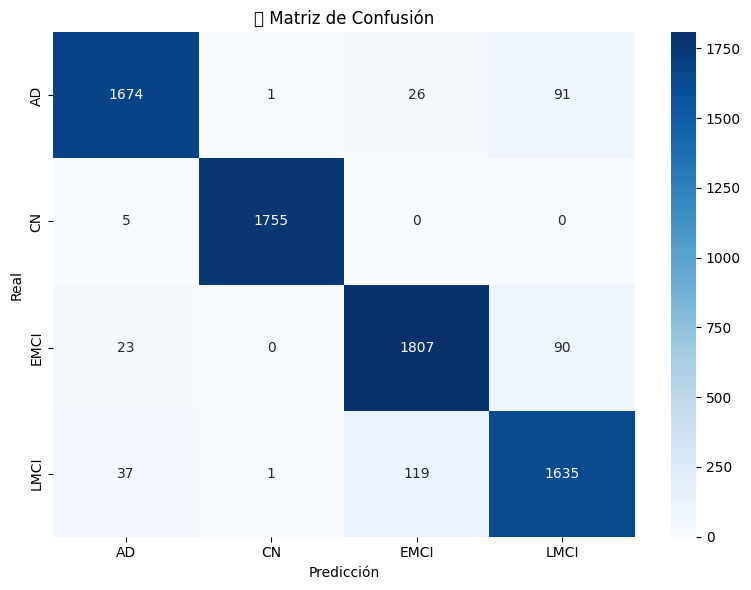

In [13]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model

model = load_model("/content/alzheimerModelo_9.keras")

start_time = time.time()

# Obtener predicciones
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes

# Evaluación básica del modelo
loss, acc = model.evaluate(test_gen, verbose=0)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"\n📊 Pérdida: {loss:.4f} | Precisión (accuracy): {acc:.4f}")
print(f"🎯 Precisión: {precision:.4f} | 🔁 Recall: {recall:.4f} | ⚖️ F1-score: {f1:.4f}")
print(f"\n📦 Total de parámetros del modelo: {model.count_params()}")
print(f"⏱️ Tiempo de evaluación: {time.time() - start_time:.2f} segundos")

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("🧠 Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


Curvas de entrenamiento

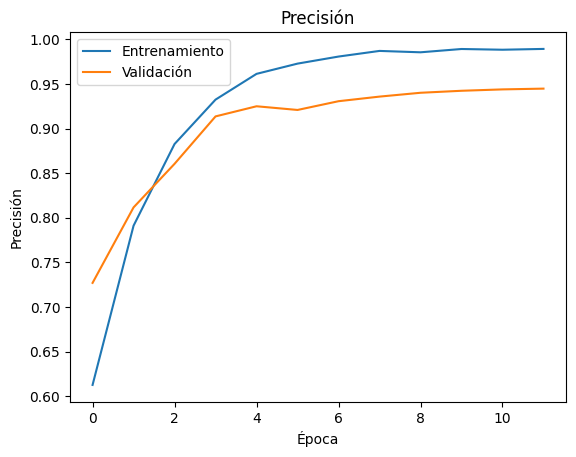

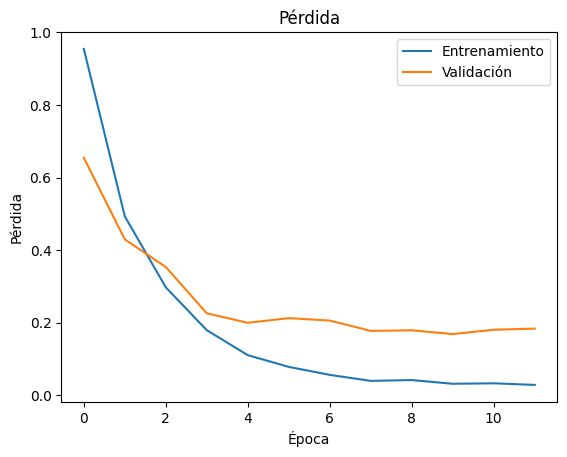

In [14]:
plt.figure()
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


Visualización de kernels

Visualizando capa: cnn2_conv1


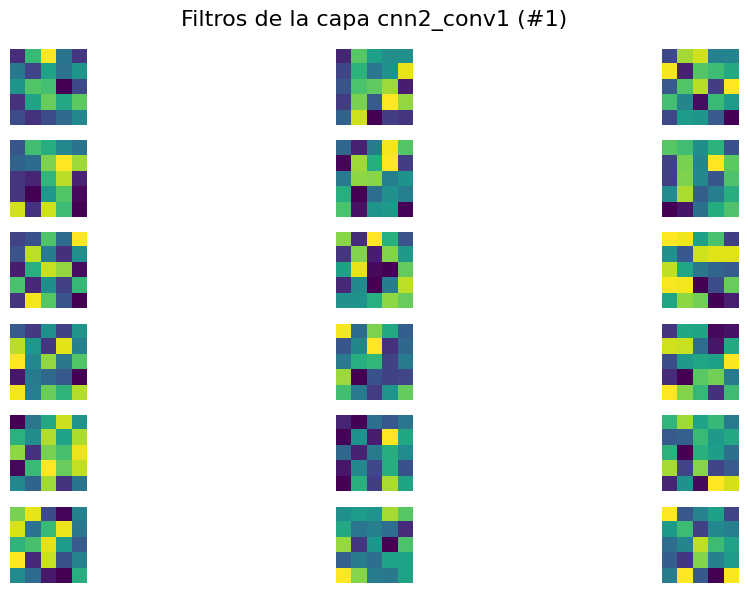

Visualizando capa: cnn2_conv2


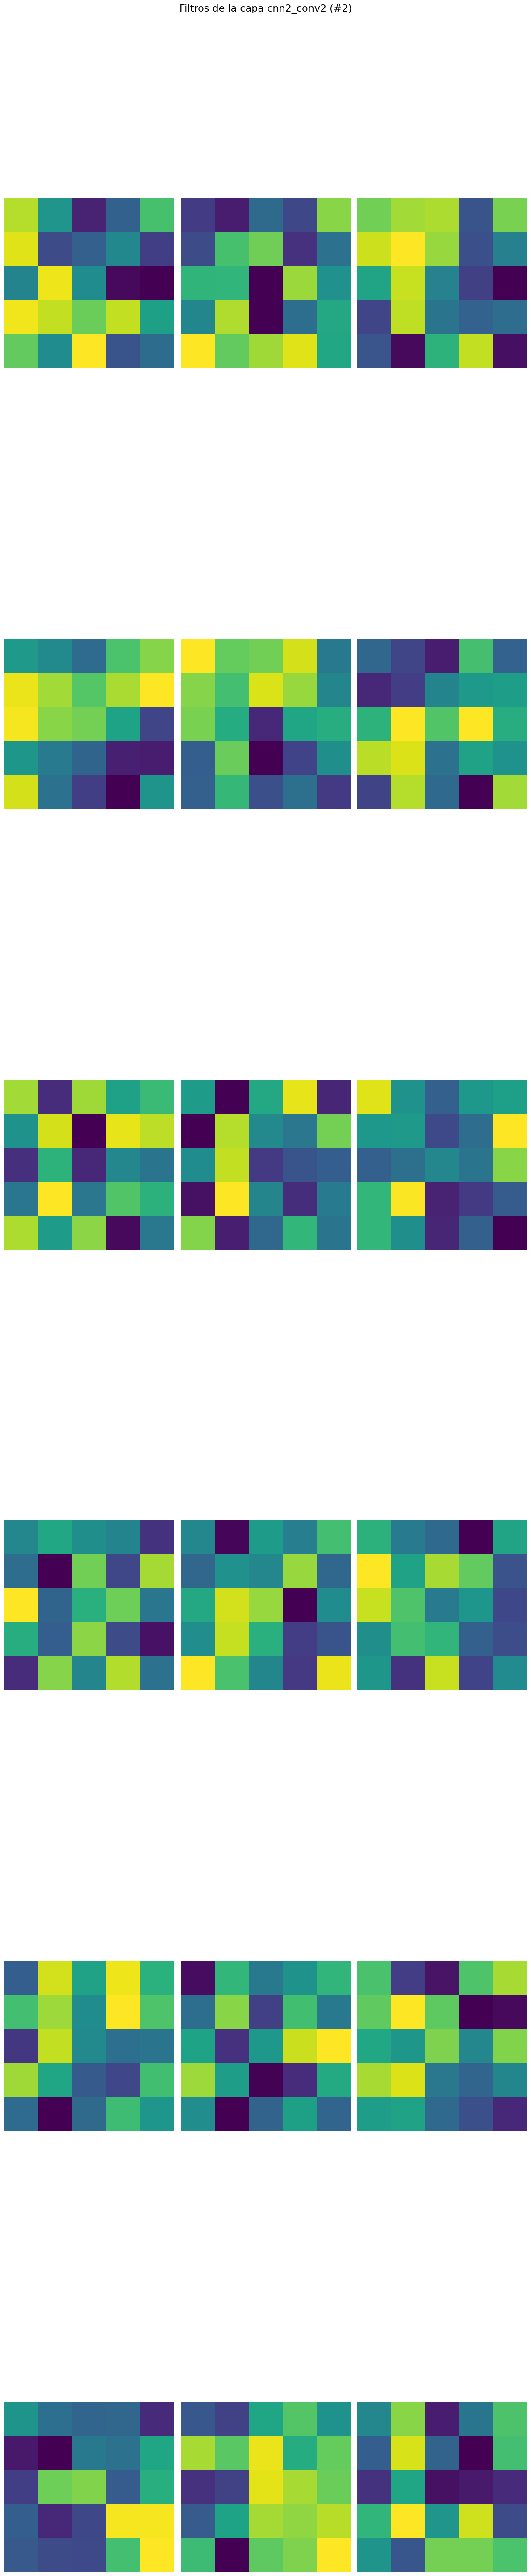

Visualizando capa: cnn2_conv3


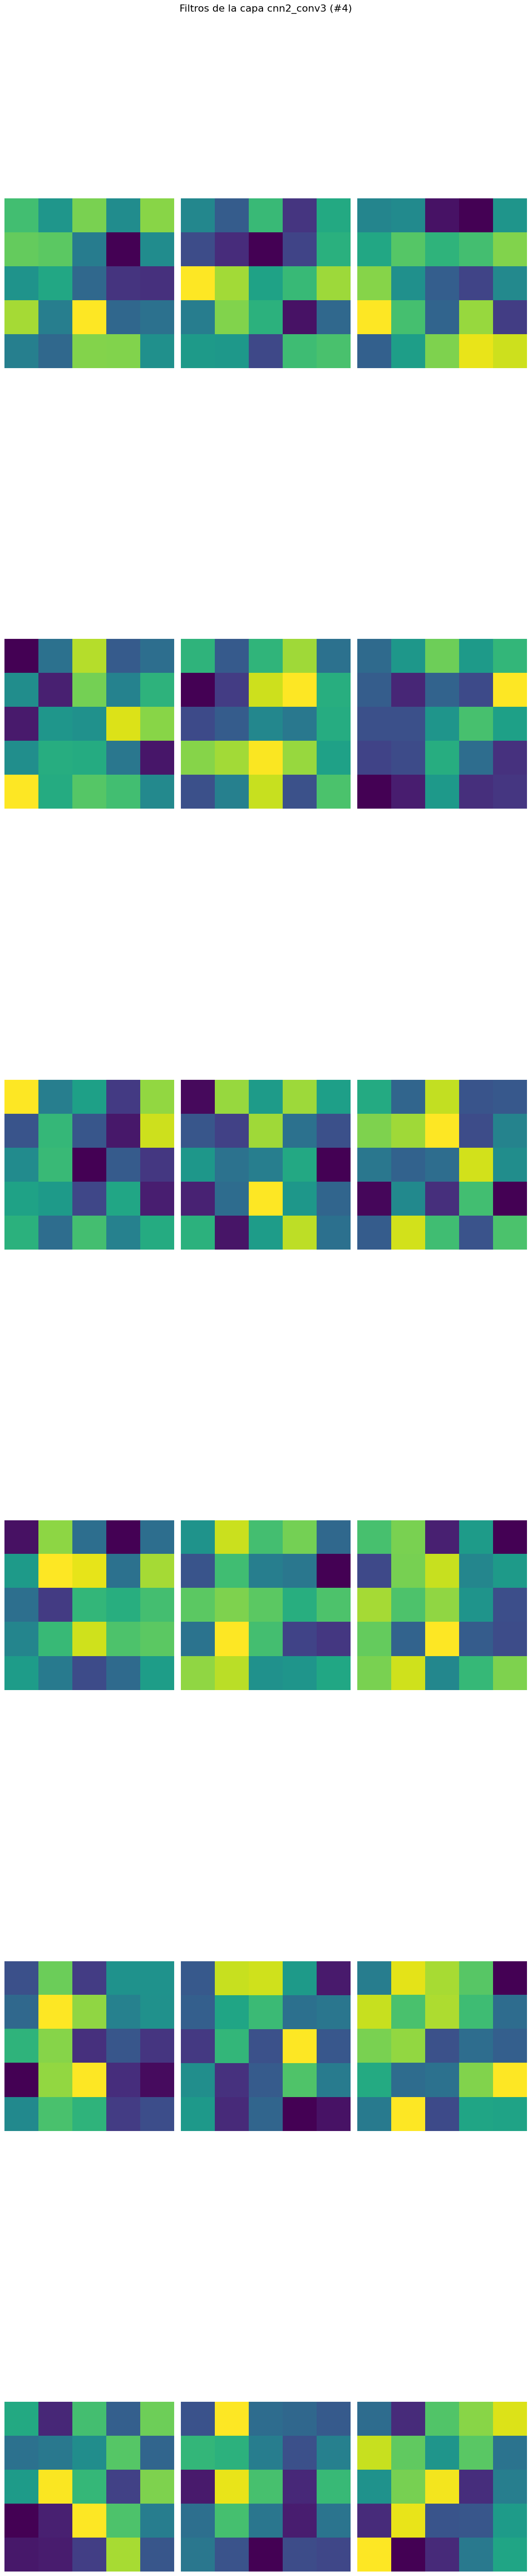

Visualizando capa: cnn2_conv4


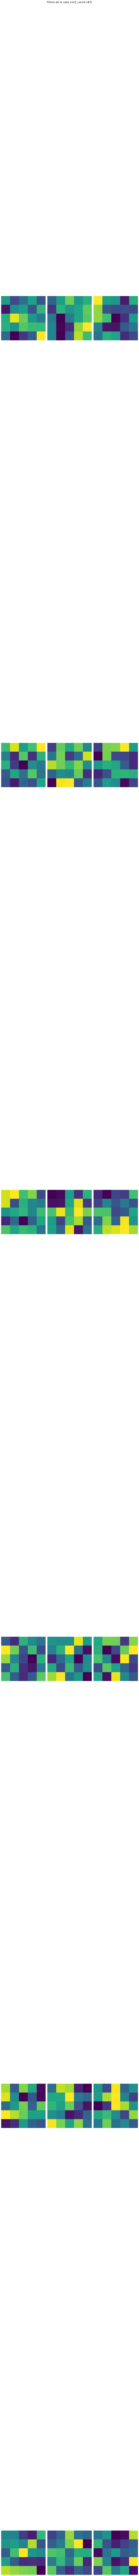

Visualizando capa: cnn2_conv5


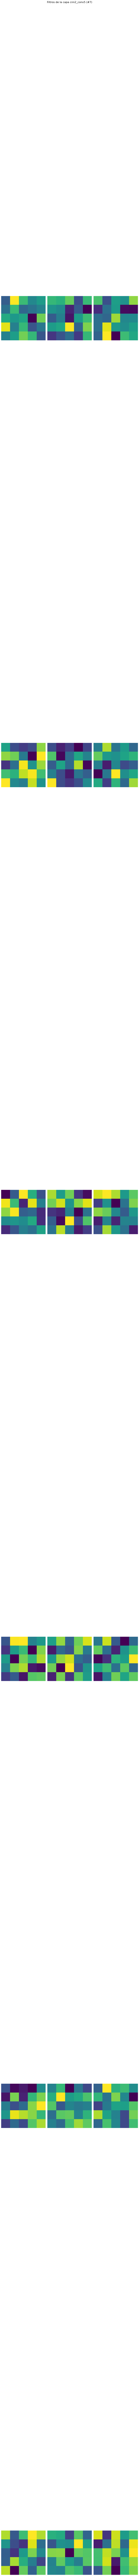

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Número de filtros a mostrar por capa
n_filters = 6

# Función para visualizar filtros de una capa
def visualizar_filtros(layer, layer_index):
    filters, biases = layer.get_weights()

    # Normalizar filtros para visualización
    filters_min = filters.min()
    filters_max = filters.max()
    filters_norm = (filters - filters_min) / (filters_max - filters_min)

    num_channels = filters.shape[2]  # canales de entrada
    num_filters = min(n_filters, filters.shape[3])

    plt.figure(figsize=(num_filters * 2, num_channels * 2))
    for i in range(num_filters):
        for j in range(min(num_channels, 3)):  # Solo mostrar hasta 3 canales
            ax = plt.subplot(num_filters, min(num_channels, 3), i * min(num_channels, 3) + j + 1)
            plt.imshow(filters_norm[:, :, j, i], cmap='viridis')
            plt.axis('off')
    plt.suptitle(f"Filtros de la capa {layer.name} (#{layer_index})", fontsize=16)
    plt.tight_layout()
    plt.show()

# Recorrer las capas convolucionales y visualizarlas
for idx, layer in enumerate(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        print(f"Visualizando capa: {layer.name}")
        visualizar_filtros(layer, idx)


Visualización con Grad-CAM

Última capa convolucional: cnn2_conv5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


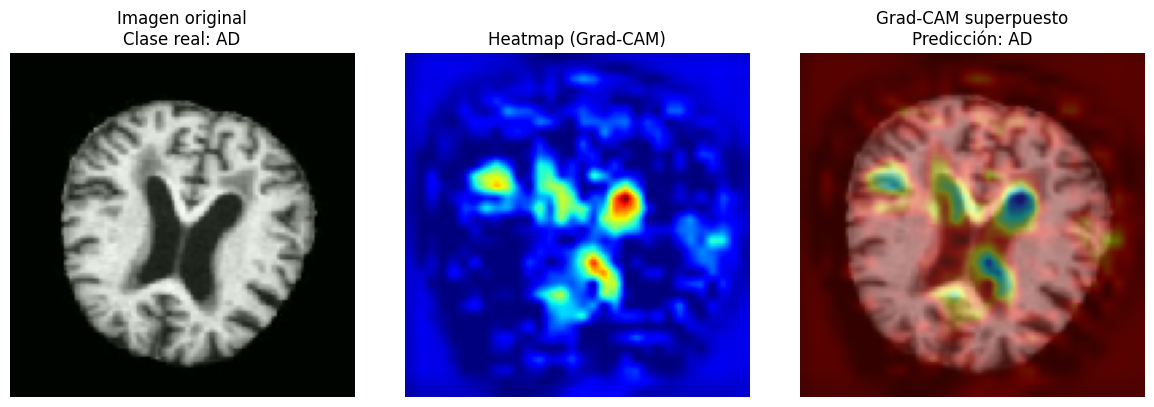

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

# Función para generar el heatmap Grad-CAM
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Obtener una imagen aleatoria del generador de prueba
img_batch, label_batch = next(test_gen)
idx = random.randint(0, len(img_batch) - 1)
img = np.expand_dims(img_batch[idx], axis=0)
original = img_batch[idx]  # Para mostrar la imagen original

# Obtener índice de etiqueta real
true_label_idx = np.argmax(label_batch[idx])
true_label_name = class_names[true_label_idx]

# Obtener nombre de la última capa convolucional
last_conv_layer_name = [layer.name for layer in model.layers if 'conv' in layer.name][-1]
print(f"Última capa convolucional: {last_conv_layer_name}")

# Obtener heatmap Grad-CAM
heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Asegurar dimensiones correctas
if heatmap.ndim != 2:
    heatmap = np.squeeze(heatmap)

# Redimensionar heatmap al tamaño exacto de la imagen original
height, width = original.shape[0], original.shape[1]
heatmap_resized = cv2.resize(heatmap.astype(np.float32), (width, height))
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)

# Convertir imagen original a RGB si es necesaria
img_rgb = np.uint8(255 * original)
if img_rgb.shape[-1] == 1:
    img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_GRAY2RGB)

# Redimensionar imagen original al tamaño del heatmap (ligeramente mayor)
scale = 1.05  # Escala de agrandamiento
new_width = int(width * scale)
new_height = int(height * scale)

# Redimensionar la imagen original y centrarla al tamaño original para que embone
resized_img_rgb = cv2.resize(img_rgb, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Recortar al centro para que coincida con el tamaño del heatmap
start_x = (new_width - width) // 2
start_y = (new_height - height) // 2
cropped_img_rgb = resized_img_rgb[start_y:start_y+height, start_x:start_x+width]

superimposed_img = cv2.addWeighted(cropped_img_rgb, 0.6, heatmap_colored, 0.4, 0)


# Predicción de la red
preds = model.predict(img)
predicted_idx = np.argmax(preds[0])
predicted_name = class_names[predicted_idx]

# Visualización
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title(f"Imagen original\nClase real: {true_label_name}")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(heatmap_resized, cmap="jet")
plt.title("Heatmap (Grad-CAM)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(superimposed_img)
plt.title(f"Grad-CAM superpuesto\nPredicción: {predicted_name}")
plt.axis("off")

plt.tight_layout()
plt.show()
